# SIT742: Modern Data Science 
**(2021 Assessment Task 01 - Data Manipulation)**

---
- Please refer to the CloudDeakin for the detailed assessment requirements.
- Please submit to Clouddeakin before the due date.
- Students with difficulty in meeting the deadline because of illness, etc. must apply for an assignment extension (up to 3 days) no later than *12:00pm on 16/04/2021 (Friday)*.


Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your information in the following cell. Please make sure you fill your Student ID and Name correctly.  
</div>

**Student Information:** Please fill your information below

- Name:  Tithra Chap
- Student ID:  220051603
- Email:  tchap@deakin.edu.au
- Lab Session and Tutor (for on campus students): 

---

# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. As an employee for Hotel Tulip, working in the Information Technology Division, it is required to prepare a set of documentation for Team-SIT742 to allow them to understand the data being dealt with. Throughout this report, some source codes are to explore the weblog, which afterwards the information is presented to Dr Bear Guts in the format of a report.

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not necessary to stick to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.




## 1.  Data ETL

### 1.1 Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import time
import datetime
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb


 <div class="alert alert-block alert-info">

**Code**: 
    You are required to load Hotel TULIP data into dataframe df_ht and check how many files are loaded.
    <br>
    *Keep the outputs for code in your notebook.
</div>



In [ ]:
# Load the zipfile into [files] variable
from zipfile import ZipFile
files =  ZipFile('/content/drive/MyDrive/Colab Notebooks/HTWebLog_p1.zip')
print('Task 1.1: Data Loading')
print('-'*60)
print('The total files loaded is: {}'.format(len(files.namelist())))



Task 1.1: Data Loading
------------------------------------------------------------
The total files loaded is: 120


 <div class="alert alert-block alert-info">

**Code**: 
    Check the data statistics and general information by printing its top 5 rows.
    <br>
    *Keep the outputs for code in your notebook.
</div>

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 1.1** Please include your result for this coding task into your SIT742-DataDictionary.xlsx, then add to your report - Part I with proper section title '1.1.1' and '1.1.2'.
</div>
    </div>


In [ ]:

#Load all files in [files] variable into dataframe [df]
#======================================================

#Get the header of the dataset
def logic(index):
    if index == 3:
       return False
    return True
header_list = pd.read_csv(files.open(files.namelist()[0]),header=None,sep="\s+",skiprows= lambda x: logic(x))
header_list.drop(columns=0,inplace=True)

#Load the files into dataframe [df]
df = pd.DataFrame()
  #The file reading will ignore # tag, use whitespace as delimiter
for i in files.namelist():
  df = df.append(pd.read_csv(files.open(i),sep='\s+',names=header_list.iloc[0,:],comment='#', encoding='iso-8859-1',header=None,na_filter=False,low_memory=False,error_bad_lines=False),ignore_index=True)

#Fill the '-' and 'None' with NAs
df.replace(to_replace=['-','None',''], value=np.nan,inplace=True)
print('Now the datasets in the files have been loaded into dataframe [df].')

Now the datasets in the files have been loaded into dataframe [df].


In [ ]:
print('Name of the dataset HTWebLog_p1.zip')
print('Size of dataset: {}, including index column'.format(df.memory_usage(index=True).sum()))
print('Date of release: from {} to {}'.format(df.iloc[0,0],df.iloc[len(df)-2,0]))
print('Number of files: {}'.format(len(files.namelist())))
print('Number of attributes: {}'.format(len(df.columns)))
print('Number of records: {}'.format(len(df)))
print('-'*60)
print('The first 5 rows of the dataset:')
df.head()

Name of the dataset HTWebLog_p1.zip
Size of dataset: 1012671728, including index column
Date of release: from 2006-11-01 to 2007-02-28
Number of files: 120
Number of attributes: 15
Number of records: 8438930
------------------------------------------------------------
The first 5 rows of the dataset:


,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,NaN,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200,0,0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,NaN,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,NaN,200,0,0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,NaN,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,NaN,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0


### 1.2 Data Cleaning

#### Remove all NAs from data


<div class="alert alert-block alert-warning">

**Code**: 
    1. Check which columns have NAs, <br>
    2. For each of those columns, display the number of NA records, <br> 
    3. emove all records with any NAs.
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 1.2** Please include your result for this coding task into your report Part I, with proper section title '1.2'.
</div>
    </div>


In [ ]:
# Task 1.2 Data Cleaning
print('Task 1.2: Data Cleaning')
print('-'*60)
#heck which columns have NAs
print('1. Column with NAs are:')
column_with_NAs = pd.DataFrame(columns={'names','values'})
for col in df.columns:
  if (df[col].isna().sum()>0):
    column_with_NAs = column_with_NAs.append({'names':df[col].name,'values':df[col].isna().sum()/len(df)*100},ignore_index=True)
    print('\t- {:14} : {:0.5f}%'.format(df[col].name,df[col].isna().sum()/len(df)*100))

#For each of those columns, display the number of NA records
print('\n2. Number of NAs in each column:')
print(df.isnull().sum())

#Remove all records with any NAs
print('\n3. Remove all records with any NAs:')
print('\t- Remove Columns with at least 15% of NAs')

#Remove Columns with at least 15% of NAs
df = df.drop(columns = column_with_NAs[column_with_NAs['values']>15]['names'])
print('\t\t Now dataset has only {} columns'.format(len(df.columns)))
print('\t- Remove NAs from all records')
print('\t\t Total records before NAs removal: {}'.format(len(df)))

#Remove NAs from all records
df = df.dropna(how = 'any')
print('\t\t Total records after NAs removal: {}'.format(len(df)))
#Remove out of scope record (at the last record)
df = df.drop(df.tail(1).index)
print('\tNOTE: An additional record has also been removed since it belongs to 2007-03-01 session which is not the focus of our study')
print('\t\t Now total records is: {}'.format(len(df)))

#Prepare and convert the dataset to an apropriate setting:
df = df.set_index(pd.to_datetime(df['date'] + ' ' + df['time']))
df = df.drop(['date','time'], axis=1)
df['s-port'] = df['s-port'].astype(int)
df['sc-status'] = df['sc-status'].astype(int)
df['sc-substatus'] = df['sc-substatus'].astype(int)
df['sc-win32-status'] = df['sc-win32-status'].astype(int)


Task 1.2: Data Cleaning
------------------------------------------------------------
1. Column with NAs are:
	- date           : 0.00002%
	- time           : 0.00002%
	- s-sitename     : 0.00002%
	- s-ip           : 0.00002%
	- cs-method      : 0.00002%
	- cs-uri-stem    : 0.00002%
	- cs-uri-query   : 93.45419%
	- s-port         : 0.00002%
	- cs-username    : 100.00000%
	- c-ip           : 0.00002%
	- cs(User-Agent) : 0.04182%
	- cs(Referer)    : 15.51924%
	- sc-status      : 0.00898%
	- sc-substatus   : 0.00898%
	- sc-win32-status : 0.00898%

2. Number of NAs in each column:
date                     2
time                     2
s-sitename               2
s-ip                     2
cs-method                2
cs-uri-stem              2
cs-uri-query       7886534
s-port                   2
cs-username        8438930
c-ip                     2
cs(User-Agent)        3529
cs(Referer)        1309658
sc-status              758
sc-substatus           758
sc-win32-status        758
dtype: int64

## 2. Data Statistics Description

### 2.1 Traffic Analysis


<div class="alert alert-block alert-warning">

**Code**: 
    Discover on the traffics by analysing hourly requests, then plot it into Bar Chart.
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.1.A** Please include your result for this coding task into your report Part I, with proper section title '2.1.A'.
</div>
    </div>


#### By day and plot 



Task 2.1 A: Traffic Analysis
------------------------------------------------------------
Plotting the bar chart of time frequency of user requests



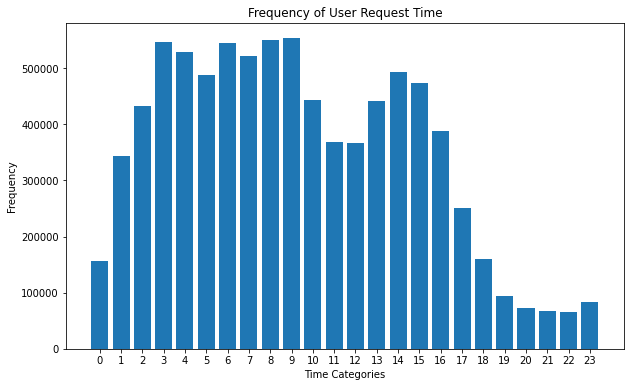


Time categories with their respective frequencies
0     155875
1     344287
2     432289
3     546655
4     529352
5     487306
6     544711
7     522365
8     550744
9     553564
10    443413
11    368947
12    367635
13    442414
14    493693
15    472843
16    387276
17    250269
18    159375
19     93829
20     72559
21     66474
22     65136
23     83633
dtype: int64


In [ ]:
# Create a bar chart of the number of server requests by hour of the day
#=======================================================================
print('Task 2.1 A: Traffic Analysis')
print('-'*60)

#Get number of hours and group them
time_cat = df.groupby(df.index.hour).size()

#Plot the bar chart of user request time
print('Plotting the bar chart of time frequency of user requests\n')
plt.figure(figsize=(10,6))
plt.bar(time_cat.index,time_cat.values)
plt.title('Frequency of User Request Time')
plt.xlabel('Time Categories')
plt.ylabel('Frequency')
plt.xticks(time_cat.index)
plt.show()

print('\nTime categories with their respective frequencies')
print(time_cat)


<div class="alert alert-block alert-warning">

**Code**: 
    You are required to filter the hourly requests by removing any below 490,000 and above 400,000. (hourly_request_amount >= 400000 & hourly_request_amount <= 490000)    
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.1.B** Please include your result for this coding task into your report, with proper section title '2.1.B'.
</div>
    </div>


In [38]:
#Task 2.1 B:
#=================================================

#Find and remove the hourly-request numbers that are >=400000 and <=490000
result = time_cat.where((time_cat<400000)|(time_cat>490000)).dropna()
result_table = pd.DataFrame(result,columns={'Frequency'})
result_table.index.name = 'Time'
print('- Below are the table showing time categories and their total numbers of hourly requests.')
print('- The total numbers of hourly requests EXCLUDE the range of between 400000 and 490000.')
display(result_table)

- Below are the table showing time categories and their total numbers of hourly requests.
- The total numbers of hourly requests EXCLUDE the range of between 400000 and 490000.


,Frequency
Time,
0,155875.0
1,344287.0
3,546655.0
4,529352.0
6,544711.0
7,522365.0
8,550744.0
9,553564.0
11,368947.0


### 2.2 Server Analysis

<div class="alert alert-block alert-warning">

**Code**: 
    Discover on the server status using 'sc-status' from DataFrame, then plot it into Pie Chart. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.2** Please include your results for this coding task into your report Part I section '2.2', <br>
    1. How many types of status reported? <br>
    2. Figure 'Server Status' in pie chart. <br>
</div>

#### Server Status

Task: 2.2: Server Analysis
------------------------------------------------------------
There are 12 types of server status

Plotting the pie chart of proportion of server status types



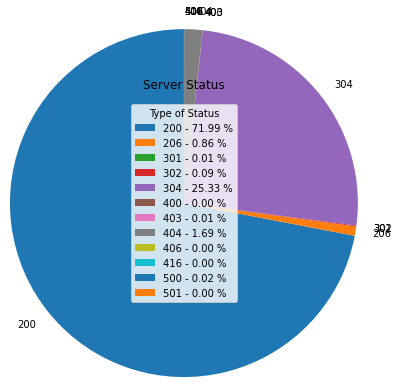

In [ ]:
#Task 2.2: Server Analysis
#======================================

print('Task: 2.2: Server Analysis')
print('-'*60)
print('There are {} types of server status'.format(len(df['sc-status'].unique())))

#Get the proportion of server status
status_cat = df.groupby(df['sc-status']).size()

#plot the pie chart
#Need to put % values in legend since data labels are crowded in the pie
print('\nPlotting the pie chart of proportion of server status types\n')
percent = 100.*status_cat.values/status_cat.values.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(status_cat.index, percent)]
plt.title('Server Status')
plt.pie(status_cat.values,labels=status_cat.index,startangle=90,radius=2)
plt.legend(title = 'Type of Status',loc='center',labels=labels)
plt.show()


### 2.3 Geographic Analysis

Clinet's IP addresses can reflect geographic information. Since different IP are from different countries even citys, we can find out the demographics information from them. You may use **DbIpCity** from **ip2geotools** to find the geolocation information from given IPs.

**Notes:**
There are some attributes in ip2geotools can help: <br>
*ip_address*: IP address <br>
*city*: city where IP address is located <br>
*region*: region where IP address is located <br>
*country*: country where IP address is located (two letters country code) <br>

#### 2.3.A Requests by Country
<div class="alert alert-block alert-warning">

**Code**: 
    Build your code with the following requirements <br>
    1. Select all requests at 01 Jan 2007 from 20:00:00 pm to 20:59:59. <br>
    2. Discover on the demographics by analysing requests from country level. <br>
    3. Plot countries of all requests in pie chart. <br>
    4. List top 3 with the numbers of requests. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.3.A** Please include your results for this coding task into your report Part I section '2.3.A', <br>
    1. How many requests raised in the period of time? <br>
    2. How many countries are invlolved? <br>
    3. Figure 'Request by Country' in pie chart. <br>
    4. top 3 countries with request numbers. <br>
</div>

In [ ]:
!pip install ip2geotools

     |████████████████████████████████| 747kB 8.6MB/s 
     |████████████████████████████████| 102kB 5.4MB/s 
     |████████████████████████████████| 829kB 31.8MB/s 
     |████████████████████████████████| 61kB 3.6MB/s 
     |████████████████████████████████| 61kB 3.7MB/s 
     |████████████████████████████████| 81kB 5.4MB/s 
     |████████████████████████████████| 348kB 48.4MB/s 
     |████████████████████████████████| 911kB 25.2MB/s 
     |████████████████████████████████| 51kB 3.1MB/s 
     |████████████████████████████████| 112kB 68.4MB/s 
     |████████████████████████████████| 235kB 55.5MB/s 
     |████████████████████████████████| 286kB 51.3MB/s 
     |████████████████████████████████| 51kB 3.6MB/s 
     |████████████████████████████████| 1.3MB 52.2MB/s 
     |████████████████████████████████| 51kB 3.7MB/s 
     |████████████████████████████████| 296kB 50.7MB/s 
     |████████████████████████████████| 143kB 45.8MB/s 
     |████████████████████████████████| 3.2MB 31.6MB/s 
  Crea

Task 2.3 A: Geographical Analysis: Requests by country 
------------------------------------------------------------
Condition: Only requests at 01 Jan 2007 from 20:00:00 pm to 20:59:59

There are : 5 counties invloved, with total requests 214:
Their names and request frequencies:
country
AU      1
CN     25
HK    169
IT      3
US     16
dtype: int64
Plot the countries of requests and their frequencies



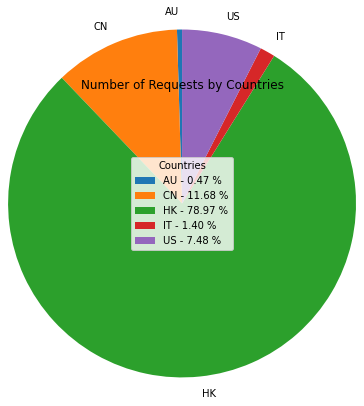


The top 3 countries are: 
country
HK    169
CN     25
US     16
dtype: int64


In [ ]:
from ip2geotools.databases.noncommercial import DbIpCity

#Task 2.3 A:
#========================================
print('Task 2.3 A: Geographical Analysis: Requests by country ')
print('-'*60)
print('Condition: Only requests at 01 Jan 2007 from 20:00:00 pm to 20:59:59\n')

#Find the countries of requests on 2007-01-01 between 20:00:00-20:59:59
target_df = pd.DataFrame()
target_df = df.loc['2007-01-01 20:00:00':'2007-01-01 20:59:59'].copy()

#Get the country from ip addresses
target_df['country'] = target_df.apply(lambda row: DbIpCity.get(row['c-ip'], api_key='free').country, axis=1)

#Group the countries and their frequencies
countries = target_df.groupby(['country']).size()

#How many countries involved?
print('There are : {} counties invloved, with total requests {}:'.format(countries.count(),countries.sum()))
print('Their names and request frequencies:')
print(countries)


#Plot the pie chart
percent = 100.*countries/countries.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(countries.index, percent)]
print('Plot the countries of requests and their frequencies\n')
plt.title('Number of Requests by Countries')
plt.pie(countries,labels=countries.index,startangle=90,radius=2)
plt.legend(title = 'Countries',labels=labels,loc='center')
plt.show()

#Top 3 countries
print('\nThe top 3 countries are: ')
print(countries.sort_values(ascending=False)[0:3])


#### 2.3.B Requests by City
<div class="alert alert-block alert-warning">

**Code**: 
    Using the selected requests from 2.3.A and build your code with the following requirements <br>
    1. Discover on the demographics by analysing requests from city level. <br>
    2. Plot cities of all requests in pie chart. <br>
    3. List top 3 with the numbers of requests. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.3.B** Please include your results for this coding task into your report Part I section '2.3.B', <br>
    1. How many cites are invlolved? <br>
    2. Figure 'Request by City' in pie chart. <br>
    3. Top 3 cities with request numbers. <br>
</div>

Task 2.3 B: Geographical Analysis: Requests by city 
------------------------------------------------------------
Condition: Only requests at 01 Jan 2007 from 20:00:00 pm to 20:59:59

There are : 11 cities invloved, with total requests 214:
Their names and request frequencies:
city
Beijing                                15
Ha Kwai Chung                         166
Hangzhou                                1
Hong Kong                               2
Jinrongjie (Xicheng District)           9
Mountain View                           1
New York                               14
Quarry Bay                              1
San Francisco (Financial District)      1
Sydney                                  1
Valcanneto                              3
dtype: int64
Plot all cities of requests and their frequencies



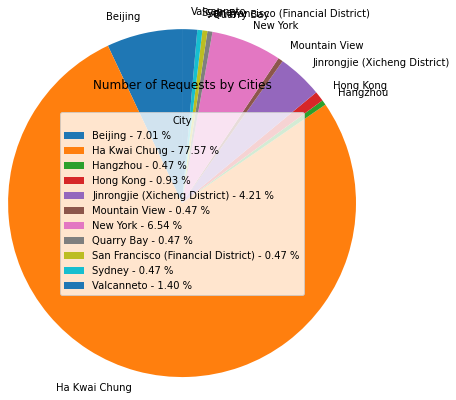


The top 3 countries are: 
city
Ha Kwai Chung    166
Beijing           15
New York          14
dtype: int64


In [ ]:
#Task 2.3 B:
#========================================
print('Task 2.3 B: Geographical Analysis: Requests by city ')
print('-'*60)
print('Condition: Only requests at 01 Jan 2007 from 20:00:00 pm to 20:59:59\n')

#Get the country from ip addresses
target_df['city'] = target_df.apply(lambda row: DbIpCity.get(row['c-ip'], api_key='free').city, axis=1)

#Group the cities and their frequencies
cities = target_df.groupby('city').size()

#How many countries involved?
print('There are : {} cities invloved, with total requests {}:'.format(cities.count(),cities.sum()))
print('Their names and request frequencies:')
print(cities)

#Plot the pie chart
percent = 100.*cities/cities.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(cities.index, percent)]
print('Plot all cities of requests and their frequencies\n')
plt.title('Number of Requests by Cities')
plt.pie(cities,labels=cities.index,startangle=90,radius=2)
plt.legend(title = 'City', labels = labels,loc='center')
plt.show()

#Top 3 countries
print('\nThe top 3 countries are: ')
print(cities.sort_values(ascending=False)[0:3])


# Part II - Web Crawling

## Overview
To better introduce all the professors including the emeritus professor, the professor and also associate professor in Deakin University School of IT, faculty will need to know all the citation information on all professors. Google Scholar is a web search engine that freely indexes the metadata of articles on many authors. Majority of the professors choose to use google scholar to track their publications and research works. Therefore,  the web crawling on google scholar will be able to have the citation information obtained across all the professors (who have the google scholar profile).


## 3. Professor List Generation

### 3.1 Import and install web crawling library. 

<div class="alert alert-block alert-warning">

**Code**: 
    Import and install your web crawling library here. 
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 3.1** Please include your result for this coding task into your report Part II, with proper section title '3.1'.
</div>

*hint: you could use selenium by doing the pip install selenium, download the webdriver for chromedriver and define your webdriver for crawling. But you are free to use any other library*



In [ ]:
# write your import and necessary web crawling libary here
print('Task 3.1: Import and install web crawling library')
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Task 3.1: Import and install web crawling library
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804

### 3.2 Find all professors in School of IT and save it as csv. 

<div class="alert alert-block alert-warning">

**Code**: 
    Find all professors in Schoolf of IT and save it as csv. The csv must have the full name of the professor (in one column), the title of the professor and University Name.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 3.2** Please include your result for this coding task into your report Part II, with proper section title '3.2'.
</div>



*hint: the url of the staff list for school of IT is https://www.deakin.edu.au/information-technology/staff-listing. you may need to iteratively find out html tag by table in the page to start crawl all the text from td (td is the elements in html table, check https://www.w3schools.com/html/html_tables.asp)*

In [ ]:
# here we first define the parsing method, you will need to use this parsing method to format the professor full name and title from the staff page.
# the name of the professor from staff page will be split by space and last two words are full name 

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

#split string function
def parse_name(stringtext):
  return " ".join(stringtext.split(" ")[-2:])," ".join(stringtext.split(" ")[:-2])

# Establish chrome driver and go to report site URL
# set options to be headless, ..
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# open it, go to a website, and get results
url = 'https://www.deakin.edu.au/information-technology/staff-listing'
driver = webdriver.Chrome('chromedriver',options=options)
driver.get(url)

#get the table id that contain the staff info
table = driver.find_elements_by_id('table09355')

#Each staff name is wrapped within an anchor inside the above tables
#So we can target the anchor
anchor = list()
for i in table:
  anchor.append(i.find_elements_by_tag_name('a'))

#collect all staffs from the <tables><anchors> and put into a professor_list
professor_list = list()
for i in anchor:
  for j in i:
    professor_list.append(j.get_attribute('innerHTML'))

#Remove names that have no relation with professor title
professor_list = [i for i in professor_list if "Professor" in i]


In [ ]:
import pandas as pd
# the crawling information will be stored in pandas dataframe and then save as csv
# below you are required to use the parse_name method to crawl the professor's full name and title
# The column name must be same as the provided professor-list.csv
print('Task 3.2: Find all professors in School of IT and save it as csv.')
print('-'*60)

#Add all professors into dataframe [professors]
professors = pd.DataFrame(columns=['Name', 'Title', 'University'])
for i in professor_list:
  new_row = {'University':'Deakin University','Title':parse_name(i)[1],'Name':parse_name(i)[0]}
  professors = professors.append(new_row,ignore_index=True)

#Write the dataframe into file
professors.to_csv('Professor-name-list.csv',index=False)
print('Professor-name-list has been created ...')
print('The content of the list: ')
professors


Task 3.2: Find all professors in School of IT and save it as csv.
------------------------------------------------------------
Professor-name-list has been created ...
The content of the list: 


,Name,Title,University
0,Lynn Batten,Emeritus Professor,Deakin University
1,Andrzej Goscinski,Emeritus Professor,Deakin University
2,Jemal Abawajy,Professor,Deakin University
3,Maia Angelova,Professor,Deakin University
4,Gleb Beliakov,Professor,Deakin University
5,Terry Caelli,Professor,Deakin University
6,Jinho Choi,Professor,Deakin University
7,Chang-Tsun Li,Professor,Deakin University
8,Robin Doss,Professor,Deakin University
9,Peter Eklund,Professor,Deakin University


## 4. Professor Citation Information Generation


### 4.1 Search the google scholar for all professors 
<div class="alert alert-block alert-warning">

**Code**: 
    Search the google scholar for all professors and obtain their citations-all, h-index-all, i10-all, citation-since2016,h-index-2016 and i10-since2016. Save the results as csv and must having **all the professors name, title and all 6 citation information.**
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.1** Please include your result for this coding task into your report Part II, with proper section title '4.1'.
</div>


*hint: if the professors did not have the google scholar profle with the name, save the 6 citation information as string "na". you could use the while loop with condition or for loop with if condition or for loop with defined method having if condition to deal with those professors do not have google scholar*

In [52]:
# search the google scholar for all professors to obtain their citations_all, h-index_all, i10_all, citation_since2016
# h-index-2016 and i10_since2016. Save the results as csv and must having all the professors name, title and all 6 citation information.
# if the professors did not have the google scholar profle with the name, save the 6 citation information as string "na"
# you are requests to use loops and Conditional Statements to finish this task (eg: while / for, if...), failed to use loop
# and conditional statements will occur 0 mark.
# hint: sometimes, to render the google scholar page, you need to wait for the brower for few seconds, you could use "from time import sleep"
# to have sleep(5) as the wait action for waiting 5 seconds.  
# The column name must be same as the provided professor-citation-information.csv 
# write your code for this part as below:

print('Task 4.1: Search the google scholar for all professors')
print('-'*60)
#Function to check whether a professor has google scholar profile
def get_check(body_div):
    try:
      return body_div.find_element_by_class_name('gs_ai_name')
    except:
      return False
#Function add citation into dataframe
def new_row(name,title,args):
  row = {'Name':name,
        'Title':title,
        'Citation-all':float(args[0]),
        'Citation-since2016':float(args[1]),
        'H-index-all':float(args[2]),
        'H-index-2016':float(args[3]),
        'I10-index-all':float(args[4]),
        'I10-index-since2016':float(args[5])
        }
  return row

#Create new dataframe
col_names=['Name','Title','Citation-all','Citation-since2016','H-index-all',
           'H-index-2016','I10-index-all','I10-index-since2016']
citations = pd.DataFrame(columns=col_names)

#Search loop for all professors
for i,j in zip(professors.Name,professors.Title):
  url = 'https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors='+i+'+Deakin'
  driver.get(url)
  #When the name has google scholar profile, the page shows the person 
  #in its main body <div> with id ='gs_bdy'
  body = driver.find_element_by_id('gs_bdy')
  result = get_check(body)

  #when the <div id='gs_bdy'> is not there, it means the professor 
  # has no profile with google scholar,and dataframe receive NaN
  if not(result):
    items = np.empty(6)
    items.fill(np.nan)
    citations = citations.append(new_row(i,j,items),ignore_index=True)
    continue

  #Click one the link on the name of the finding professor
  result.find_element_by_tag_name('a').click()
  #Wait at least 5s before table id='gsc_rsb_st' loaded, and get its content
  table = WebDriverWait(driver,5).until(EC.presence_of_element_located((By.ID,'gsc_rsb_st')))

  #All the numberical data of citation contained in td with id='gsc_rsb_std'
  td  = table.find_elements_by_class_name('gsc_rsb_std')

  #Add the td contents into dataframe
  items = []
  for ele in td:
    items.append(ele.get_attribute('innerHTML'))
  citations = citations.append(new_row(i,j,items),ignore_index=True)
print('\nBelow is the dataframe to be written into csv file...\n')
print(citations)
citations.to_csv('Professor-citation-informaton.csv',index=False)


Task 4.1: Search the google scholar for all professors
------------------------------------------------------------

Below is the dataframe to be written into csv file...

                    Name  ... I10-index-since2016
0            Lynn Batten  ...                21.0
1      Andrzej Goscinski  ...                 NaN
2          Jemal Abawajy  ...                 NaN
3          Maia Angelova  ...                14.0
4          Gleb Beliakov  ...                86.0
5           Terry Caelli  ...                36.0
6             Jinho Choi  ...                95.0
7          Chang-Tsun Li  ...                65.0
8             Robin Doss  ...                 NaN
9           Peter Eklund  ...                23.0
10             Seng Loke  ...                50.0
11  Antonio Robles-Kelly  ...                27.0
12    Jean-Guy Schneider  ...                21.0
13            Yong Xiang  ...                95.0
14         John Yearwood  ...                45.0
15      Arkady Zaslavsky  ..

### 4.2 Find out the professor name having the most citations 

<div class="alert alert-block alert-warning">

**Code**: 
    Find out the professor name having the most citations (please remove those professor who does not have google scholar page)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.2** Please include your result for this coding task into your report Part II, with proper section title '4.2'.
</div>


In [53]:
# find out the professor name having the most citations (please remove those professor who does not have google scholar page)
# write your code here
print('Task 4.2: Find out the professor name having the most citations')
print('-'*60)

print('Drop the professor name who dose not have google scholar profile...')
top_professor = citations.copy().dropna()

top_professor = top_professor [top_professor ['Citation-all']==np.max(top_professor ['Citation-all'])]['Name']
print('\nProfessor name has the most citations is: {}'.format(top_professor.values))


Task 4.2: Find out the professor name having the most citations
------------------------------------------------------------
Drop the professor name who dose not have google scholar profile...

Professor name has the most citations is: ['Arkady Zaslavsky']


### 4.3 Find out the row for associate professor having the most i10-index since 2016 
<div class="alert alert-block alert-warning">

**Code**: 
    Find out the row for associate professor having the most i10-index since 2016 (please remove those professor who does not have google scholar page)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.3** Please include your result for this coding task into your report Part II, with proper section title '4.3'.
</div>


In [54]:
# find out the row for associate professor having the most i10_index since 2016 (please remove those professor who does not have google scholar page)
# write your code here
print('Task 4.3: Find out the row for associate professor having the most i10-index since 2016')
print('-'*60)

print('Drop the professor name who dose not have google scholar profile...')
top_i10_2006 = citations.copy().dropna()

top_i10_2006 = top_i10_2006[top_i10_2006['Title']=='Associate Professor']
top_i10_2006 = top_i10_2006[top_i10_2006['I10-index-since2016']==top_i10_2006['I10-index-since2016'].max()]

print('\nThe associate professor who has recorded the most i10-index since 2006 is: ')
top_i10_2006

Task 4.3: Find out the row for associate professor having the most i10-index since 2016
------------------------------------------------------------
Drop the professor name who dose not have google scholar profile...

The associate professor who has recorded the most i10-index since 2006 is: 


,Name,Title,Citation-all,Citation-since2016,H-index-all,H-index-2016,I10-index-all,I10-index-since2016
20,Gang Li,Associate Professor,4111.0,2821.0,28.0,24.0,88.0,60.0


### 4.4 Find out all the professors name who has the citations_since2016 > 2500
<div class="alert alert-block alert-warning">

**Code**: 
    You are required to do the conditional filter and print to find out those (professors, associate professors) with the citations-since2016 > 2500 (please remove those without a public google scholar page).

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.4** Please include your result for this coding task into your report Part II, with proper section title '4.4'.
</div>


In [57]:
# find out all the professors name who has the citations_since2016 > 2500
# write your code here
print('Task 4.4: Find out all the professors name who has the citations_since2016 > 2500')
print('-'*60)

print('Drop the professor name who dose not have google scholar profile...')
target_professor = citations.copy().dropna()

target_professor = target_professor[target_professor['Citation-since2016']>2500]['Name']
print('\nProfessor names with citations_since2016 > 2500:')
for i in target_professor:
  print('\t- {}'.format(i))

Task 4.4: Find out all the professors name who has the citations_since2016 > 2500
------------------------------------------------------------
Drop the professor name who dose not have google scholar profile...

Professor names with citations_since2016 > 2500:
	- Gleb Beliakov
	- Jinho Choi
	- Seng Loke
	- Yong Xiang
	- Arkady Zaslavsky
	- Gang Li
